<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Multinomial Logistic Regression Lab

---

## Introduction

In this lab you will practice performing multinomial logistic regression while also applying cross-validation and regularisation on a popular sample dataset about bikesharing. You'll be predicting the season according to the given weather data.

---

## Aim

1. Structure a new dataframe with features, create dummy features with pd.get_dummies(), and join dummies to the data frame
2. Use the bikeshare dataset to create cross-validated multinomial logistic regression models.
3. Build 3 different models: default logistic regression, logistic regression with l1-penalty, and logistic regression with l2-penalty. Report on the accuracy reached in each case.

--- 
## Additional Resources

- [The bikeshare dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#)
- [Cross-validation with sklearn](http://scikit-learn.org/stable/modules/cross_validation.html)
- [Logistic regression with sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 
---

## 1. Load the libraries and the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score

In [5]:
path = 'bikeshare/bikeshare.csv'
bikeshare = pd.read_csv(path)
bikeshare.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
bikeshare.shape

(17379, 17)

In [7]:
bikeshare.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

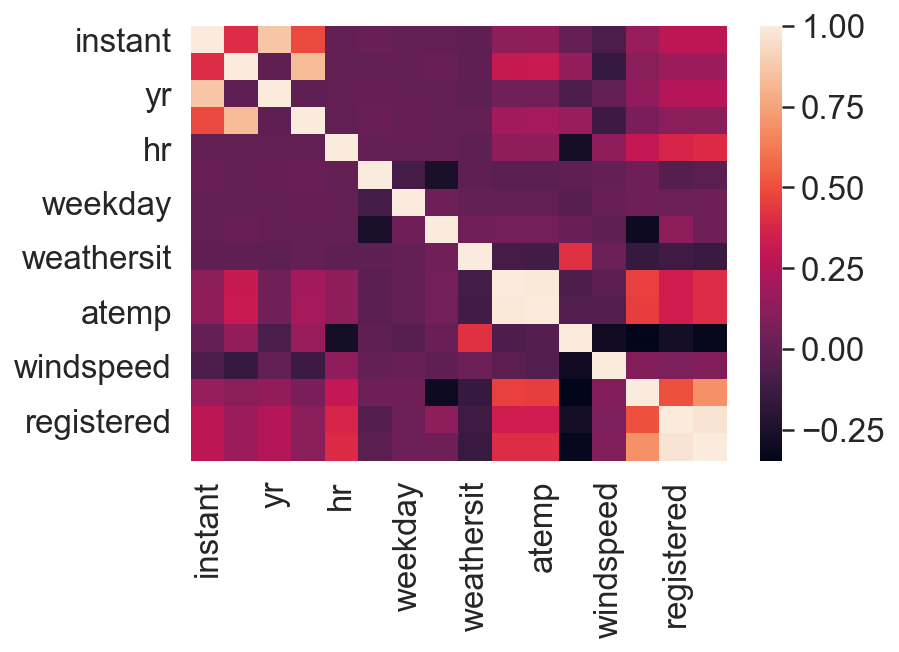

In [8]:
sns.heatmap(bikeshare.corr())
plt.show()

In [9]:
bikeshare.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
bikeshare.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
bikeshare.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [12]:
seasons = bikeshare.season.unique()

In [13]:
bikeshare.weathersit.unique()

array([1, 2, 3, 4])

In [14]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather',drop_first=True)
weather.head()

,weather_2,weather_3,weather_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


### 2. Join the bikeshare dataframe and the weather dataframe

In [15]:
df = bikeshare.join(weather)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_2,weather_3,weather_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0,0,0


### 3. Choose the weatherrelated features as predictors and the season as response

In [16]:
X = df[['temp', 'atemp', 'hum', 'windspeed', 'weather_2', 'weather_3', 'weather_4']]
y = df.season

### 4. Perform a train-test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, shuffle= True)

### 5. Rescale the data set.

Use the standard scaler with `fit_transform` on the training set and with transform on the `test set`. Why would you consider doing it in this way?

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()

#Use the standard scaler with `fit_transform` on the training set
X_train_std = ss.fit_transform(X_train) 

#and with transform on the `test set`.
X_test_std = ss.fit(X_test).transform(X_test) 

# Why would you consider doing it in this way?

/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Abdullah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys


### 6. Fit a logistic regression model on the training set. Evaluate it and get the predictions on the test set.

In [21]:
# fit a model (one vs. the rest)
ovr = LogisticRegression(multi_class='ovr')
ovr.fit(X_train_std, y_train)

/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
ovr.score(X_test_std, y_test)

0.5821346375143843

In [23]:
# fit a model (multinomial)
sm = LogisticRegression(multi_class='multinomial' , solver='lbfgs')
sm.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
sm.score(X_test_std, y_test)

0.594289413118527

In [25]:
y_pred_ovr = ovr.predict(X_test_std)
y_pred_sm = sm.predict(X_test_std)

### 7. Report the accuracy, the confusion matrix and the classification report on the test set

In [26]:
from sklearn.metrics import accuracy_score

accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
accuracy_sm = accuracy_score(y_test, y_pred_sm)
print('accuracy of one vs. rest model:', accuracy_ovr)
print('accuracy of multinomial model:', accuracy_sm)

accuracy of one vs. rest model: 0.5821346375143843
accuracy of multinomial model: 0.594289413118527


In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix_ovr = confusion_matrix(y_test, y_pred_ovr)
confusion_matrix_sm = confusion_matrix(y_test, y_pred_sm)
print(confusion_matrix_ovr)
print(confusion_matrix_sm)

[[2579  246   24  531]
 [ 606 1028 1155  754]
 [   0  293 3214  113]
 [1157  634  297 1273]]
[[2500  292    2  586]
 [ 477 1430  888  748]
 [   0  525 3017   78]
 [1030  779  236 1316]]


In [28]:
#calculating accuracy from confusion matrix

#accuracy = sum of true positives (trace of matrix = sum of diagnal)/total of population

accuracy_ovr2 = np.trace(confusion_matrix_ovr)/np.sum(confusion_matrix_ovr)
accuracy_sm2 = np.trace(confusion_matrix_sm)/np.sum(confusion_matrix_sm)

print('accuracy of one vs. rest model:', accuracy_ovr2)
print('accuracy of multinomial model:', accuracy_sm2)

accuracy of one vs. rest model: 0.5821346375143843
accuracy of multinomial model: 0.594289413118527


In [29]:
# classification report on the test set?!!! ask HAKAMI About it

### 8. Use LogisticRegressionCV to fit a range of l1 penalty values to the training set. 

Hint: l1-penalty requires setting the solver to liblinear.

In [30]:
l1_model = LogisticRegressionCV(penalty='l1', solver='liblinear')
l1_model.fit(X_train_std,y_train)

/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l1',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0)

### 9. Use LogisticRegressionCV to fit a range of l2 penalty values to the training set. 

In [31]:
#l2_model = LogisticRegressionCV(penalty='l2')
l2_model = LogisticRegressionCV() #penalty='l2' is the default setting
l2_model.fit(X_train_std,y_train)

/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

### 10. Obtain the confusion matrices for the predictions on the test set obtained with the l1 and l2 regularized models. Compare and explain your findings.

In [32]:
y_pred_l1 = l1_model.predict(X_test_std)
y_pred_l2 = l2_model.predict(X_test_std)

confusion_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
confusion_matrix_l2 = confusion_matrix(y_test, y_pred_l2)

print(confusion_matrix_l1, '\n')
accuracy_l1 = np.trace(confusion_matrix_l1)/np.sum(confusion_matrix_l1)
print('accuracy of l1-regularized model:', accuracy_l1, '\n')

print(confusion_matrix_l2, '\n')
accuracy_l2 = np.trace(confusion_matrix_l2)/np.sum(confusion_matrix_l2)
print('accuracy of l2-regularized model:', accuracy_l2, '\n')


[[2210 1170    0    0]
 [ 267 2583  693    0]
 [   0  922 2698    0]
 [ 714 2493  154    0]] 

accuracy of l1-regularized model: 0.5387658227848101 

[[2801  177   56  346]
 [ 717  621 1472  733]
 [   2  163 3321  134]
 [1481  465  397 1018]] 

accuracy of l2-regularized model: 0.5581846950517837 



In [33]:
l1_model.score(X_test_std, y_test), l2_model.score(X_test_std, y_test)

(0.5387658227848101, 0.5581846950517837)

### 11. Plot the accuracy obtained on the training set versus the penalty strength for both, l1 and l2.

In [36]:
import numpy as np
l1_acc= []
l2_acc = []
lambd = []
for i in np.logspace(-4, 4, 30):
    logcv1 = LogisticRegression(penalty='l1', solver="liblinear", C = i)
    logcv2 = LogisticRegression(penalty='l2', C = i)
    logcv1.fit(X_train_std, y_train)
    logcv1.predict(X_test_std)
    logcv2.fit(X_train_std, y_train)
    logcv2.predict(X_test_std);
    lambd.append(i);
    l1_acc.append(logcv1.score(X_test_std, y_test))
    l2_acc.append(logcv2.score(X_test_std, y_test))



/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Abdullah/anaconda3/l

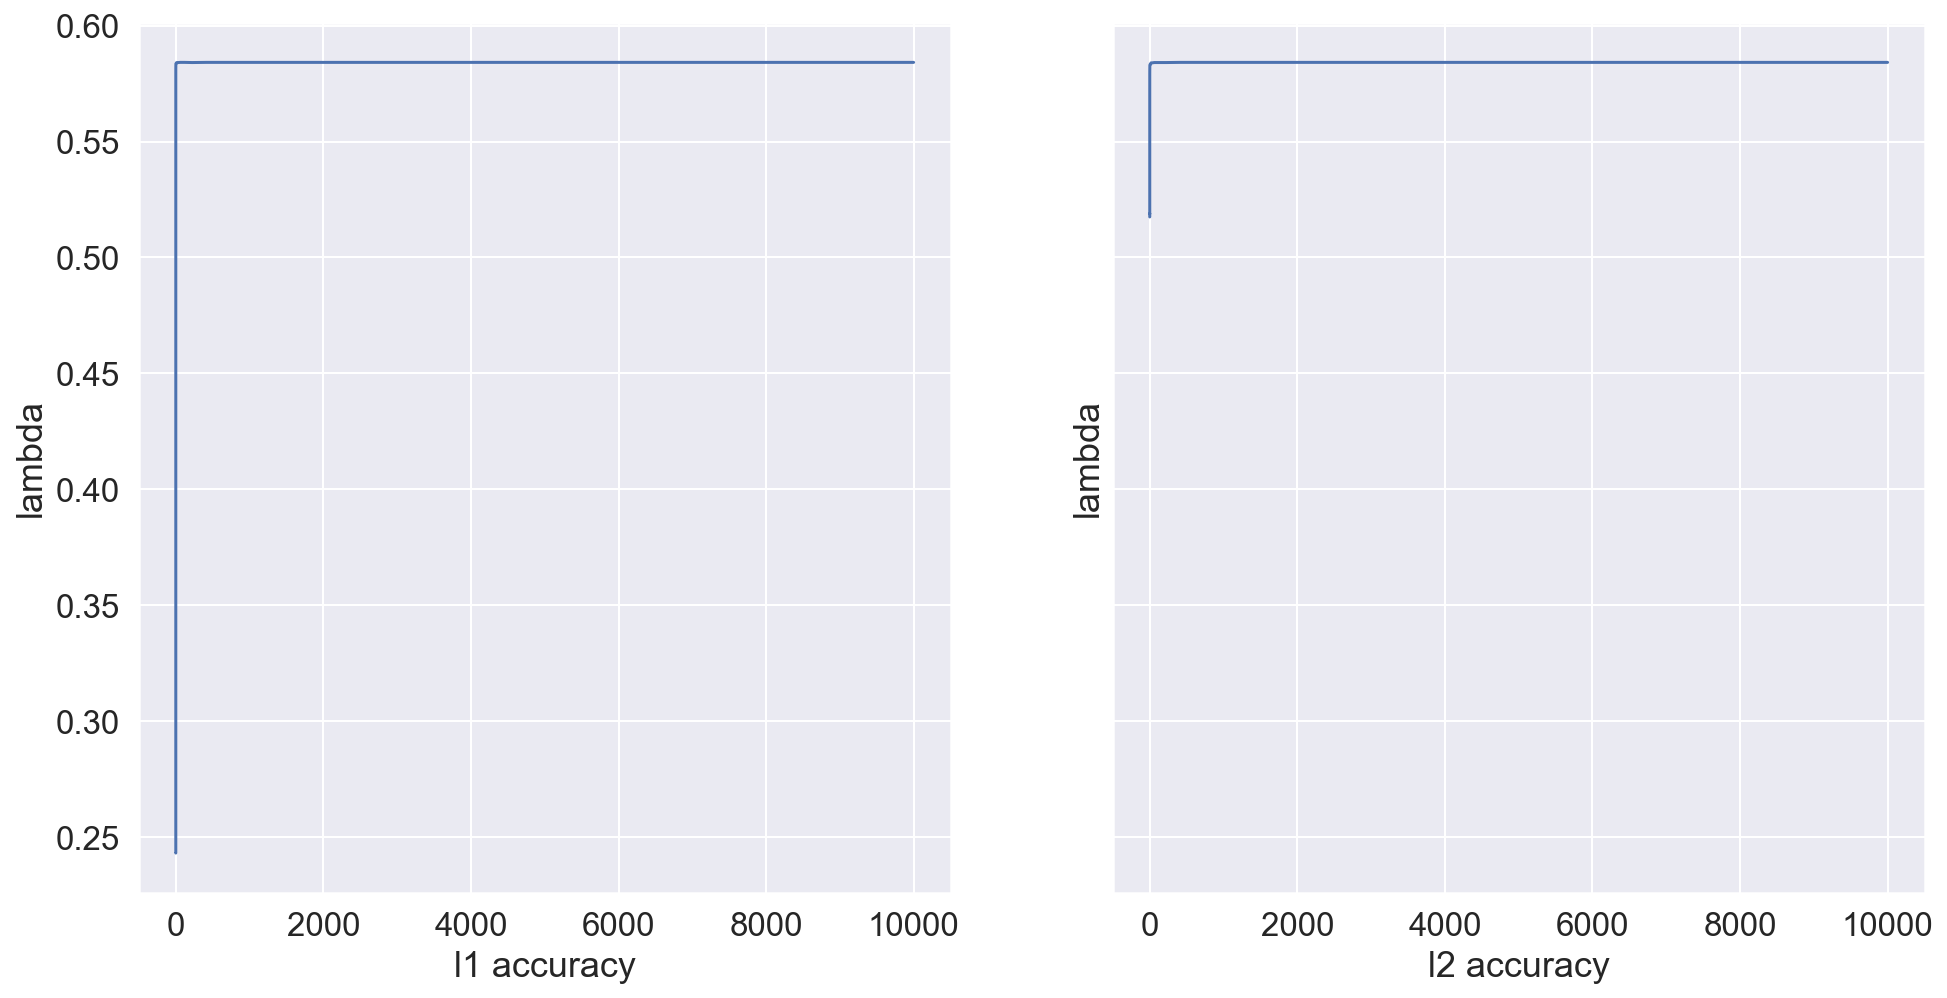

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8), sharey=True)
ax1.plot(alpha, l1_acc)
ax2.plot(alpha, l2_acc)
ax1.set_xlabel("l1 accuracy")
ax2.set_xlabel("l2 accuracy")
ax1.set_ylabel("lambda")
ax2.set_ylabel("lambda")
plt.show()

### 12. Bonus: Create a ROC curve and a precision-recall curve for the best l1 and l2 models

In [40]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics